In [1]:
#imports
import tensorflow as tf
import numpy as np
from tensorflow import keras
from os import path, getcwd, chdir
from tensorflow.keras import layers
from tensorflow.keras import activations
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#get mnist data

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#normalize inputs
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


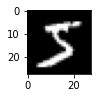

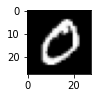

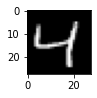

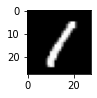

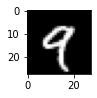

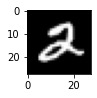

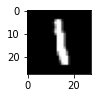

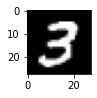

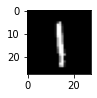

In [3]:
#plot the image

for i in range(9):  
  plt.subplot(330 + 1 +i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  plt.show()

In [76]:
#check shapes of the data
print(tf.shape(x_train))#should be 28x28x60000
print(tf.shape(y_train))#should be 1x60000 or just 60,000 (60000 labels)
#then x_test is 24x24x10000
print(tf.shape(x_test))
print(tf.shape(y_test))
print(y_test[0:100])

tf.Tensor([60000    28    28], shape=(3,), dtype=int32)
tf.Tensor([60000], shape=(1,), dtype=int32)
tf.Tensor([10000    28    28], shape=(3,), dtype=int32)
tf.Tensor([10000], shape=(1,), dtype=int32)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


In [4]:
#callbacks so I can stop training when accuracy is above a certain value
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.998:
      print("Reached 99.8 percent training accuracy, training has finished")
      self.model.stop_training = True
callbacks = myCallback()

In [5]:
#make the neural network
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),#flattens from a 28x28 matrix to a 784 input tensor
  tf.keras.layers.Dense(532, activation=activations.sigmoid),#532 = ((2/3) * 784) + 10, which I found online as a good starting point for the number of hidden units
  tf.keras.layers.Dense(10, activation= activations.sigmoid)
])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])


In [6]:
#fit/train, pass the callbacks= parameter the callback instance so we can control training 
history = model.fit(x_train, y_train, epochs = 10, callbacks=[callbacks], validation_split = .2)
print("Training Accuracy:>" + str(round(history.history['accuracy'][-1], 3)))#print training accuracy rounded to 3 decimal places when its done fitting

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.3651 - accuracy: 0.8967 - val_loss: 0.2278 - val_accuracy: 0.9353
Epoch 2/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1952 - accuracy: 0.9424 - val_loss: 0.1636 - val_accuracy: 0.9513
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1320 - accuracy: 0.9614 - val_loss: 0.1243 - val_accuracy: 0.9628
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0950 - accuracy: 0.9719 - val_loss: 0.1001 - val_accuracy: 0.9706
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0710 - accuracy: 0.9787 - val_loss: 0.0907 - val_accuracy: 0.9726
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0531 - accuracy: 0.9842 - val_loss: 0.0890 - val_accuracy: 0.9731
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0399 - accuracy: 0.9884 - val_loss: 0.0851 - val_accuracy:

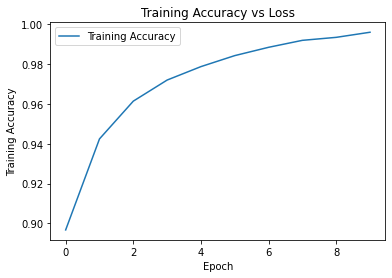

In [7]:
#graph the models performance while training (we put the return metrics into a variable called history)
plt.plot(history.history['accuracy'])

plt.title("Training Accuracy vs Loss")
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'], loc='upper left')
plt.show()

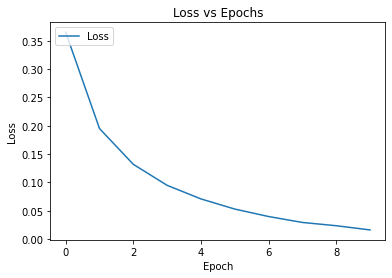

In [8]:
plt.plot(history.history['loss'])

plt.title("Loss vs Epochs")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss'], loc='upper left')
plt.show()

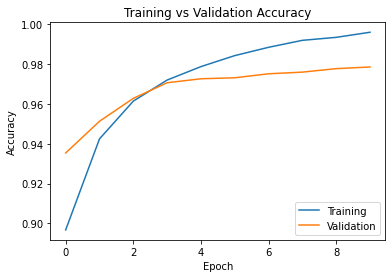

In [9]:
#plot training vs validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc = 'lower right')

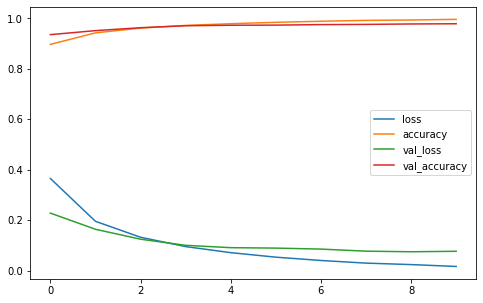

In [10]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

tf.Tensor([10000    10], shape=(2,), dtype=int32)
tf.Tensor([10], shape=(1,), dtype=int32)


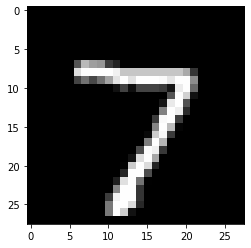

Predicted:>7
   Actual:>7


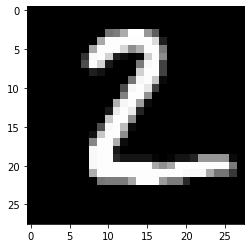

Predicted:>2
   Actual:>2


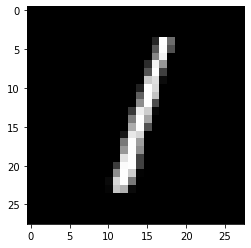

Predicted:>1
   Actual:>1


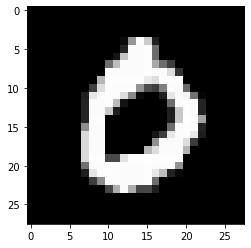

Predicted:>0
   Actual:>0


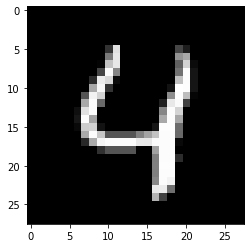

Predicted:>4
   Actual:>4


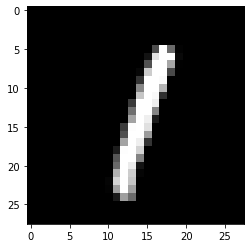

Predicted:>1
   Actual:>1


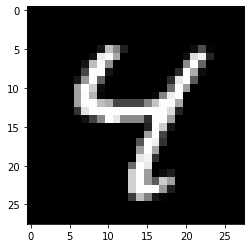

Predicted:>4
   Actual:>4


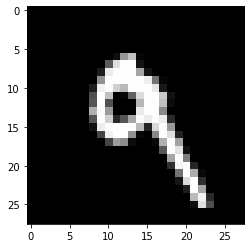

Predicted:>9
   Actual:>9


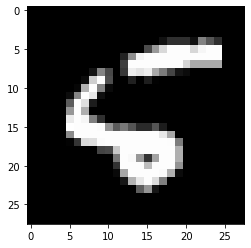

Predicted:>6
   Actual:>5


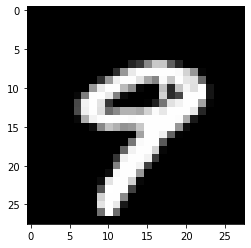

Predicted:>9
   Actual:>9


In [11]:
predictions = model.predict(x_test)
print(tf.shape(predictions))
print(tf.shape(predictions[0]))
#convert predictions from list of 10 to max of that list of ten
max_index = 0
max = 0
pred_label_version = []
for i in range(len(predictions)):
  max_index = 0
  max = 0 
  for j in range(len(predictions[i])):
    if predictions[i][j] > max:
      max = predictions[i][j]
      max_index = j
  pred_label_version.append(max_index)
predictions = pred_label_version
#for i in range(10):
#  print("Prediction:>" + str(predictions[i]))
#  print("Actual:>" + str(y_test[i]))
#display the input image then the predicted label
for i in range(10): 
  plt.imshow(x_test[i], cmap='gray')
  plt.show()
  print("Predicted:>" + str(predictions[i]))
  print("   Actual:>" + str(y_test[i]))




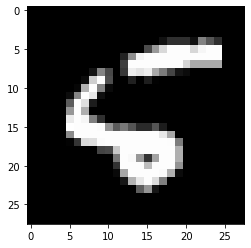

Predicted:>6
   Actual:>5


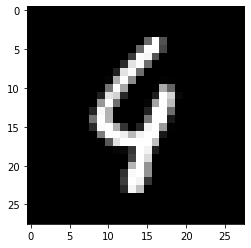

Predicted:>9
   Actual:>4


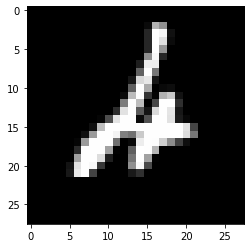

Predicted:>2
   Actual:>4


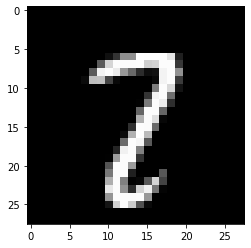

Predicted:>7
   Actual:>2


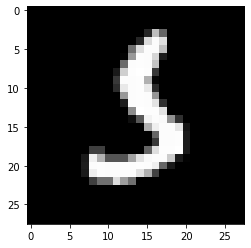

Predicted:>3
   Actual:>5


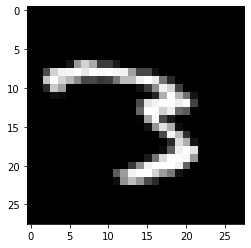

Predicted:>7
   Actual:>3


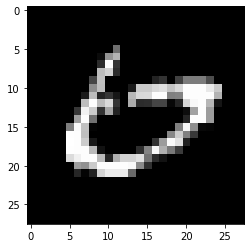

Predicted:>0
   Actual:>6


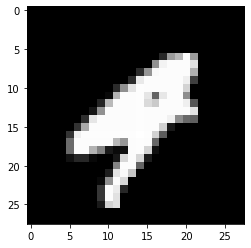

Predicted:>9
   Actual:>4


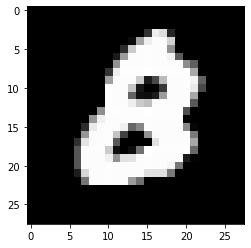

Predicted:>2
   Actual:>8


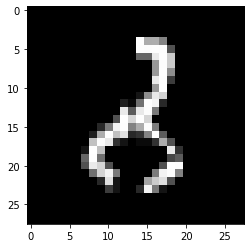

Predicted:>2
   Actual:>8


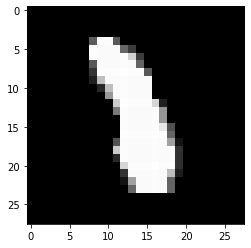

Predicted:>8
   Actual:>1


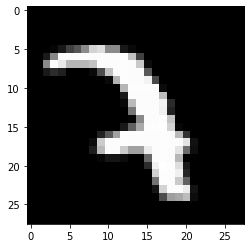

Predicted:>3
   Actual:>7


In [107]:
#look at some wrong predictions
wrong_indices = []
for i in range(len(predictions)):
  if predictions[i] != y_test[i]:
    wrong_indices.append(i)
n = 10
for j in range(len(wrong_indices)):
  plt.imshow(x_test[wrong_indices[j]], cmap='gray')
  plt.show()
  print("Predicted:>" + str(predictions[wrong_indices[j]]))
  print("   Actual:>" + str(y_test[wrong_indices[j]]))
  if j > n:
    break
